# AMATH 522: HW2
## Minho Choi
### Problem 1

Here we import all the packages we needed:

In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline 

import scipy.optimize as opt
import scipy.linalg as la

We first initialize our parameters:
* A = 3 (with 100 individuals for each age)
* p0 = 0.5, p1 = 0.9, p2 = 0.95
* f0 = 0, f1 = 1, f2 = 5, f3 = 0.5

In [3]:
n0 = np.array([100, 100, 100, 100])
L = np.array([[0, 1, 5, .5], [.5, 0, 0, 0], [0, .9, 0, 0], [0, 0, .95, 0]])
print(L)

[[0.   1.   5.   0.5 ]
 [0.5  0.   0.   0.  ]
 [0.   0.9  0.   0.  ]
 [0.   0.   0.95 0.  ]]


Iterate dynamical model:

In [4]:
Tmax = 50

nT = np.zeros([4, Tmax])
nT[:, 0] = n0

for t in range(Tmax - 1):
    nT[:, t + 1] = np.dot(L, nT[:, t])

(1) Plot the log of the total population size $N(t)$ over time $t$:

Text(0.5, 1.0, 'Log of Total Population N(t) over Time t')

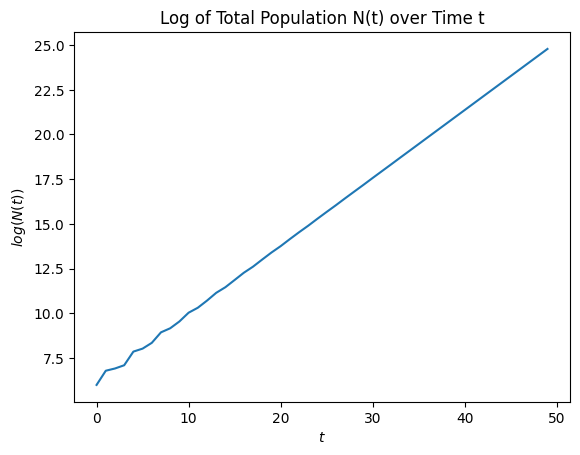

In [5]:
generations=np.arange(Tmax)
plt.plot(generations,np.log(nT.sum(axis = 0)))
plt.ylabel('$log(N(t))$')
plt.xlabel('$t$')
plt.title('Log of Total Population N(t) over Time t')

(2) Plot the fraction of individuals in each age $w_a(t)$ over time $t$:

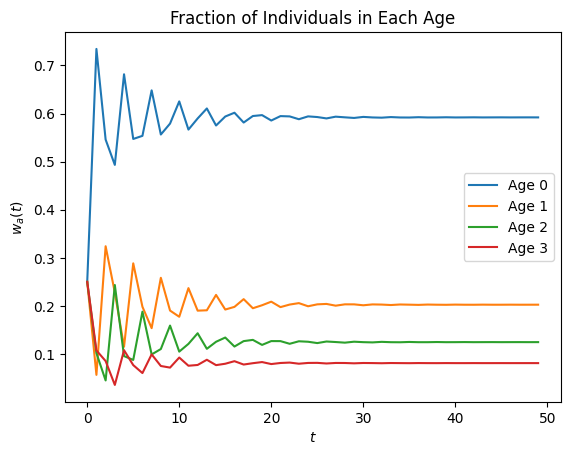

In [6]:
plt.plot(generations,nT[0,:] / nT.sum(axis = 0),label="Age 0")
plt.plot(generations,nT[1,:] / nT.sum(axis = 0),label="Age 1")
plt.plot(generations,nT[2,:] / nT.sum(axis = 0),label="Age 2")
plt.plot(generations,nT[3,:] / nT.sum(axis = 0),label="Age 3")
plt.ylabel('$w_a(t)$')
plt.xlabel('$t$')
plt.title('Fraction of Individuals in Each Age')
plt.legend()

(3) We use the numpy **polyfit** function to fit a first order polynomial to the log $N(t)$ and find the growth rate $\lambda$:

In [7]:
p = np.polyfit(generations, np.log(nT.sum(axis = 0)), 1)
lambdaEst = np.exp(p[0])
print(lambdaEst)

1.462571777438042


Hence, the estimated $\lambda$ value is: 1.462571777438042

(4) We now use Euler-lotka formula to find the population growth rate $\lambda$:

In [8]:
def euLot(lam, IArray, fArray):
    """compute the Euler-Lotka sum, taking as arguments a scalar and two 1-D numpy arrays"""
    n = IArray.size # n = length of Ia = length of fa
    ageArray = np.arange(0, n) # array 0, 1, 2, ... n
    tempArray = lam**(-(ageArray+1)) * IArray * fArray # save each term of sum into temporary array
    return sum(tempArray) - 1

IArr=np.array([1, .5, .5 * .9, .5 * .9 * .95])
fArr=np.array([0, 1, 5, .5])
args=(IArr,fArr)

leftBracket = .001
rightBracket = 5

opt.brentq(euLot, leftBracket, rightBracket, args)

1.4623759092509916

We get very similar $\lambda$ value 1.4623759092509916 but a little bit lower than the $\lambda$ value in (3) which is 1.462571777438042.

### Problem 2

(a) Consider the Euler-lotka formula:
$$1 = \sum_{a=0}^N f_a I_a \lambda^{-(a+1)}$$
Since the northern spotted owl start breeding at age $a = 3$, we have $f_a = 0$ for $a < 3$. Then, for this problem, the Euler-lotka formula becomes:
$$1 = \sum_{a=3}^N f_a I_a \lambda^{-(a+1)}$$
This means that the values of $I_a$ for $a < 3$ do not affect the growth rate $\lambda$. Therefore, any choice of $p_a$ values for $a < 3$ will yield the same long-term population growth rate $\lambda$.

(b) For the age-structured model, the projection matrix is same as the Lesie matrix Hence, with the given setting, the projection matrix for the owl population is the following (For convenience, we let $p_0 = p_1 = 1$ and $p_2 = 0.0722$):

In [57]:
A = np.zeros((51, 51))

for i in range(3, 50):
    A[0, i] = 0.24
    A[i+1, i] = 0.942

A[1, 0] = 1
A[2, 1] = 1
A[3, 2] = 0.0722
A[0, -1] = 0.24

np.set_printoptions(threshold=np.inf)
A

array([[0.    , 0.    , 0.    , 0.9   , 0.9   , 0.9   , 0.9   , 0.9   ,
        0.9   , 0.9   , 0.9   , 0.9   , 0.9   , 0.9   , 0.9   , 0.9   ,
        0.9   , 0.9   , 0.9   , 0.9   , 0.9   , 0.9   , 0.9   , 0.9   ,
        0.9   , 0.9   , 0.9   , 0.9   , 0.9   , 0.9   , 0.9   , 0.9   ,
        0.9   , 0.9   , 0.9   , 0.9   , 0.9   , 0.9   , 0.9   , 0.9   ,
        0.9   , 0.9   , 0.9   , 0.9   , 0.9   , 0.9   , 0.9   , 0.9   ,
        0.9   , 0.9   , 0.24  ],
       [1.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    ],
       [0.    , 1.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    

(c) To compute the long-term growth rate $\lambda$, we find the largest eigenvalue:

In [58]:
l,v = la.eig(A)
idx=np.argsort(np.abs(l))
l_sorted=l[idx]
v_sorted=v[:,idx] 
lambda_max= l_sorted[-1]
print(lambda_max)

(1.003077478693227+0j)


Hence, we can $\lambda = 0.9438912196207914$.

Also, using the Euler-lotka model, we get:

In [56]:
fArr = A[0, :]

pArr = np.zeros(50)
for i in range(50):
    pArr[i] = A[i+1, i]

IArr = np.zeros(51)
IArr[0] = 1
for i in range(1, 51):
    IArr[i] = np.prod(pArr[:i])

args=(IArr,fArr)

leftBracket = .001
rightBracket = 2

opt.brentq(euLot, leftBracket, rightBracket, args)

0.9812218562327697

We get the same growth rate $\lambda$ value up to 13 decimal places.